In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [97]:
df = pd.read_csv('https://raw.githubusercontent.com/roshancyriacmathew/Car-price-prediction-using-Linear-regression-Machine-Learning-Project/refs/heads/main/car%20data.csv')

In [98]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [100]:
df.shape

(301, 9)

In [101]:
df.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [102]:
print(df['Fuel_Type'].unique())
print(df['Seller_Type'].unique())
print(df['Transmission'].unique())
# print(df['Owner'].unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']


In [103]:
df['Fuel_Type'].value_counts()

,count
Fuel_Type,
Petrol,239
Diesel,60
CNG,2


In [104]:
df['Seller_Type'].value_counts()

,count
Seller_Type,
Dealer,195
Individual,106


In [105]:
df['Transmission'].value_counts()

,count
Transmission,
Manual,261
Automatic,40


### For feeding the data into our model our Machine we should turn Categorical dataset into numerical dataset. How?

**We have 2 ways for encoding the Catigorical Data:**
1. Manual Encoding (Without Using One-Hot Encoding Library)

2. Using One-Hot Encoding Library (implementation using pandas' get_dummies function)
* Each category becomes a new column with binary values (0 or 1).
* This approach doesn't imply any order between categories.
* It works well for both ordinal and nominal data.

**By using either `manual encoding` or `one-hot encoding`, you can effectively convert categorical data into numerical representations suitable for most machine learning algorithms. Choose the appropriate method based on your specific needs and the nature of your data.**


### First Method: Manual Encoding

In [106]:
manual_encodeing_fuel_type = {'Petrol': 0, 'Diesel': 1, 'CNG': 2}
manual_encodeing_seller_type = {'Dealer': 0, 'Individual': 1}
manual_encodeing_transmission_type = {'Manual': 0, 'Automatic': 1}

In [107]:
df_manual_encoding = df.copy()

In [108]:
df_manual_encoding['Fuel_Type'] = df['Fuel_Type'].map(manual_encodeing_fuel_type)
df_manual_encoding['Seller_Type'] = df['Seller_Type'].map(manual_encodeing_seller_type)
df_manual_encoding['Transmission'] = df['Transmission'].map(manual_encodeing_transmission_type)

In [109]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [110]:
df_manual_encoding.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


###Second Method: Using One-Hot Encoding Library

In [111]:
df_one_hot_encoded = pd.get_dummies(df, columns=['Fuel_Type', 'Seller_Type','Transmission'])

In [112]:
df_one_hot_encoded.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,ritz,2014,3.35,5.59,27000,0,False,False,True,True,False,False,True
1,sx4,2013,4.75,9.54,43000,0,False,True,False,True,False,False,True
2,ciaz,2017,7.25,9.85,6900,0,False,False,True,True,False,False,True
3,wagon r,2011,2.85,4.15,5200,0,False,False,True,True,False,False,True
4,swift,2014,4.60,6.87,42450,0,False,True,False,True,False,False,True


In [113]:
df_one_hot_encoded = pd.get_dummies(df, columns=['Fuel_Type', 'Seller_Type','Transmission'], drop_first=True, dtype=int)

In [114]:
df_one_hot_encoded.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,ritz,2014,3.35,5.59,27000,0,0,1,0,1
1,sx4,2013,4.75,9.54,43000,0,1,0,0,1
2,ciaz,2017,7.25,9.85,6900,0,0,1,0,1
3,wagon r,2011,2.85,4.15,5200,0,0,1,0,1
4,swift,2014,4.60,6.87,42450,0,1,0,0,1


In [115]:
df_manual_encoding.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    int64  
 6   Seller_Type    301 non-null    int64  
 7   Transmission   301 non-null    int64  
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 21.3+ KB


In [116]:
df_one_hot_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Car_Name                301 non-null    object 
 1   Year                    301 non-null    int64  
 2   Selling_Price           301 non-null    float64
 3   Present_Price           301 non-null    float64
 4   Kms_Driven              301 non-null    int64  
 5   Owner                   301 non-null    int64  
 6   Fuel_Type_Diesel        301 non-null    int64  
 7   Fuel_Type_Petrol        301 non-null    int64  
 8   Seller_Type_Individual  301 non-null    int64  
 9   Transmission_Manual     301 non-null    int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 23.6+ KB


Except for the **Car_Name** column which is an object other data are numerical

### Splitting the data and Target

In [117]:
X = df_one_hot_encoded.drop(['Car_Name', 'Selling_Price'], axis=1) # independet variables
y = df_one_hot_encoded['Selling_Price'] # dependent variable

In [118]:
X

,Year,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2014,5.59,27000,0,0,1,0,1
1,2013,9.54,43000,0,1,0,0,1
2,2017,9.85,6900,0,0,1,0,1
3,2011,4.15,5200,0,0,1,0,1
4,2014,6.87,42450,0,1,0,0,1
...,...,...,...,...,...,...,...,...
296,2016,11.60,33988,0,1,0,0,1
297,2015,5.90,60000,0,0,1,0,1
298,2009,11.00,87934,0,0,1,0,1
299,2017,12.50,9000,0,1,0,0,1


In [119]:
y

,Selling_Price
0,3.35
1,4.75
2,7.25
3,2.85
4,4.60
...,...
296,9.50
297,4.00
298,3.35
299,11.50


In [120]:
X.shape, y.shape

((301, 8), (301,))

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [122]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((240, 8), (61, 8), (240,), (61,))

### Model Training : Linear Regression

### Scaling The Features
Scaling features is a crucial preprocessing step in machine learning. It helps ensure that all features are treated equally by the algorithm, regardless of their original scales. Let's dive into the importance of scaling and explore some common techniques.
Why Scaling is Important?

1. **Prevents Feature Dominance:** Without scaling, features with larger ranges can dominate the model, potentially leading to poor generalization.
2. **Improves Convergence:** Many optimization algorithms converge faster when features are scaled similarly.
3. **Enhances Interpretability:** Some models, like linear regression, become more interpretable when features are standardized.
4. **Supports Distance-based Algorithms:** Techniques like k-nearest neighbors work more effectively with scaled features.

Choosing the Right Scaling Technique
1. **StandardScaler:** Good for normally distributed features and when you want to preserve outliers.
2. **MinMaxScaler:** Useful when you know the bounds of your data and want to transform them to a specific range.
3. **LogScaler:** Effective for skewed distributions and when you want to reduce the effect of extreme values.
4. **RobustScaler:** Ideal when dealing with outliers and you want to scale based on quantiles rather than mean and standard deviation.

### Common Scaling Techniques

1. Standardization (Z-Score Normalization)

  from sklearn.preprocessing import StandardScaler

  scaler = StandardScaler()

  X_scaled = scaler.fit_transform(X)

  * Standardization transforms features to have a mean of 0 and a standard deviation of 1.

  * Formula: z = (x - μ) / σ

  * Where:

  * z is the standardized score
  * x is the raw score
  * μ is the mean of the sample
  * σ is the standard deviation of the sample

2. Min-Max Scaling (Normalization)

  from sklearn.preprocessing import MinMaxScaler

  scaler = MinMaxScaler()

  X_scaled = scaler.fit_transform(X)

  * Min-max scaling rescales features to a common range, typically between 0 and 1.

  Formula: x' = (x - min(x)) / (max(x) - min(x))



In [123]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [124]:
model = LinearRegression()

In [125]:
model.fit(X_train, y_train)

LinearRegression()

### Model Evaluation

In [126]:
y_pred = model.predict(X_test)
y_pred

array([ 1.61218503,  8.56979154,  5.97990635, -3.63605936,  9.92374977,
        6.95932709,  0.2646362 , -0.21085531,  0.23966185,  7.13959635,
        8.93697522, -0.51051   ,  8.44509612,  2.17439889,  6.49156804,
        2.21978684, -0.47650355, 11.67699198,  0.64773654,  1.41946908,
       -0.68515665,  7.81685418,  6.27856061,  2.05490905, -0.33464636,
        3.21885835,  5.02081067,  2.19713066,  1.12610489,  0.71703232,
       -0.69741133,  9.14136391, -1.77714384,  1.76665253,  8.31625624,
        4.03233868,  7.44754386,  8.28714567,  2.04209924,  8.72848098,
        4.08534074,  3.81861526,  3.87965135, -0.61568136,  6.88768253,
       -0.64611924,  7.55568309, 12.19505742,  2.43515394,  4.64960892,
        6.43509385,  1.20055804, 23.03513863, 18.34877153,  7.01442596,
        9.82059439,  4.00644982,  8.85269717,  1.39243988,  7.2246128 ,
       -0.96071535])

In [127]:
print("MAE: ", (metrics.mean_absolute_error(y_pred, y_test)))
print("MSE: ", (metrics.mean_squared_error(y_pred, y_test)))

MAE:  1.3148827436026767
MSE:  3.5519951903903384


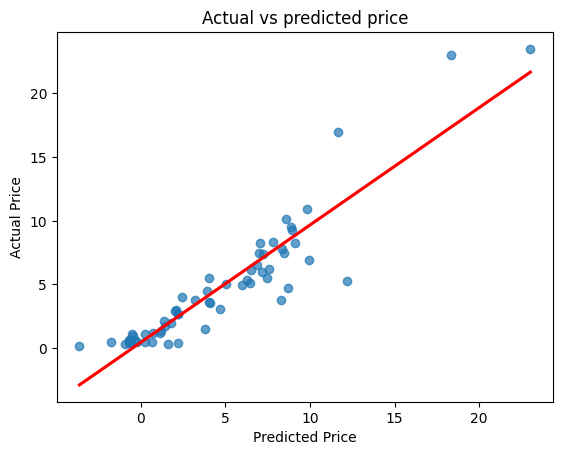

In [131]:
# 1-  Data Points: Each point on the plot represents a single prediction. The x-coordinate is the predicted price, and the y-coordinate is the actual price.
# 2-  Regression Line: Seaborn automatically adds a regression line to the plot. This line shows the overall trend of the predictions compared to the actual values.

sns.regplot(x=y_pred, y=y_test, ci=None, scatter_kws={'alpha': 0.7}, line_kws={'color':'red'})
plt.xlabel("Predicted Price")
plt.ylabel('Actual Price')
plt.title("Actual vs predicted price")
plt.show()


Interpreting the Plot
* **Accuracy:** Points close to the diagonal (or regression line) indicate accurate predictions.
* **Bias:** If points systematically deviate from the diagonal, it suggests bias in your model.
* **Variance:** Spread of points indicates variance in predictions.
* **Outliers:** Any points far away from the rest of the data might indicate anomalies or errors in your model.


In [135]:
print("MAE: ", (metrics.mean_absolute_error(y_pred, y_test)))
print("MSE: ", (metrics.mean_squared_error(y_pred, y_test)))
print("MSE on training data: ", (metrics.mean_squared_error(model.predict(X_train), y_train)))

MAE:  1.3148827436026767
MSE:  3.5519951903903384
MSE on training data:  2.9437205399630035


`accuracy_score()` is designed for `classification problems like iris`, **not regression problems like car price prediction**.

**For regression tasks**, we typically use metrics like `Mean Squared Error (MSE)` or `Root Mean Squared Error (RMSE)`. Let's adjust our approach for a car price prediction scenario.